In [1]:
from astropy.io import fits
from astropy.wcs import WCS
import os

# -------------------------------
#  Path to the FITS file
# -------------------------------
filename = "/Users/wavefunction/Downloads/acisf15387N003_cntr_img2.fits"
if not os.path.exists(filename):
    raise FileNotFoundError(f"File '{filename}' not found in current directory.")

# -------------------------------
#  Open the FITS file
# -------------------------------
with fits.open(filename) as hdul:
    print(f"\nFITS file: {filename}")
    print(f"Number of HDUs: {len(hdul)}\n")

    # Loop through HDUs to display summary
    for i, hdu in enumerate(hdul):
        print(f"--- HDU {i} ---")
        print(f"Name: {hdu.name}")
        print(f"Header keys: {len(hdu.header)}")
        print(f"Data shape: {hdu.data.shape if hdu.data is not None else 'None'}")
        print(f"Data type: {hdu.data.dtype if hdu.data is not None else 'None'}")

        # Show units if defined
        bunit = hdu.header.get("BUNIT", None)
        if bunit:
            print(f"Data units (BUNIT): {bunit}")
        else:
            print("No BUNIT keyword found.")

        # Show WCS if possible
        try:
            wcs = WCS(hdu.header)
            if wcs.wcs.naxis > 0:
                print("WCS info available:")
                print(wcs)
        except Exception as e:
            print("No valid WCS found.")

        print("-" * 50)

# Optional: if you want to access data specifically:
with fits.open(filename) as hdul:
    data = hdul[0].data  # or another HDU like hdul[1] depending on the file
    header = hdul[0].header
    print("\nPrimary Header:")
    print(repr(header))

    # If you want to explore keywords one-by-one
    print("\nSome header keywords:")
    for key in ["DATE", "TELESCOP", "INSTRUME", "OBJECT", "BUNIT", "CTYPE1", "CTYPE2"]:
        print(f"{key}: {header.get(key, 'N/A')}")


FITS file: /Users/wavefunction/Downloads/acisf15387N003_cntr_img2.fits
Number of HDUs: 6

--- HDU 0 ---
Name: PRIMARY
Header keys: 921
Data shape: (1024, 1024)
Data type: >i4
No BUNIT keyword found.
WCS info available:
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 160.88297859051 24.969737371544 
CRPIX : 488.97 859.17 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.00013666666666667 0.00013666666666667 
NAXIS : 1024  1024
--------------------------------------------------
--- HDU 1 ---
Name: GTI
Header keys: 28
Data shape: (1,)
Data type: (numpy.record, [('START', '>f8'), ('STOP', '>f8')])
No BUNIT keyword found.
WCS info available:
WCS Keywords

Number of WCS axes: 2
CTYPE : '' '' 
CRVAL : 0.0 0.0 
CRPIX : 0.0 0.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : 1.0 1.0 
NAXIS : 16  1
--------------------------------------------------
--- HDU 2 ---
Name: GTI
Header keys: 28
Data shape: (1,)
Data type: (numpy.record, [('START', '>f8'), 

Set MJD-END to 56313.582870 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 56313.582870 from DATE-END'. [astropy.wcs.wcs]


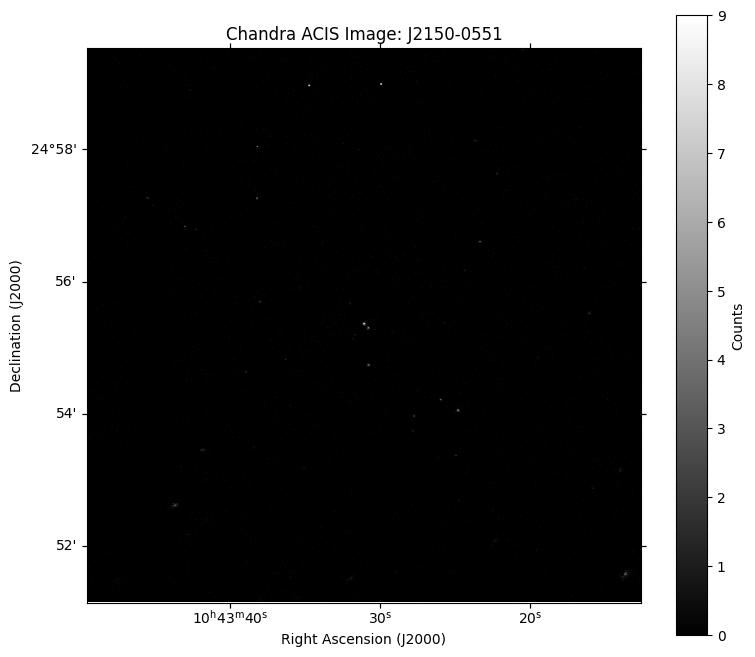

In [3]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# Replace this with the full path to your FITS file
fits_file = '/Users/wavefunction/Downloads/acisf15387N003_cntr_img2.fits'

# Load the FITS file
with fits.open(fits_file) as hdul:
    data = hdul[0].data
    header = hdul[0].header
    wcs = WCS(header)

# Plot with WCS axes
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection=wcs)
im = ax.imshow(data, origin='lower', cmap='gray', vmin=0, vmax=data.max() * 0.5)
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')
ax.set_title('Chandra ACIS Image: J2150-0551')
plt.colorbar(im, ax=ax, label=header.get('BUNIT', 'Counts'))

plt.tight_layout()
plt.show()